In [1]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [2]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

In [3]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [4]:
genre = "드라마"
movie_genre = movie_df[movie_df["장르"].str.contains(genre)]
top_genre = top_movie[top_movie["장르"].str.contains(genre)]

movie_genre

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
8,8,씨비스킷,2003-11-21,12세관람가,드라마,미국,미국,브에나비스타인터내셔널,월트디즈니코리아㈜,게리 로스,...,0,0,0,0,1,1,2003,11,2003,11
17,8,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,291500,291500,34,34,1,4,2003,11,2003,11
24,7,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,40000,331500,3,37,1,2,2003,11,2003,11
42,8,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,676000,1007500,98,135,1,2,2003,11,2003,11
49,13,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,...,0,0,0,0,1,1,2003,11,2003,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482738,44,사랑할 땐 누구나 최악이 된다,2022-08-25,15세이상관람가,"멜로/로맨스,드라마",노르웨이,노르웨이,NaN,"그린나래미디어(주),(주)하이스트레인저",요아킴 트리에,...,373036,469596171,47,46201,2,2,2022,12,2022,8
482743,39,이스터 선데이,2022-12-28,12세이상관람가,"코미디,드라마",미국,미국,NaN,씨제이 씨지브이(CJ CGV)(주),제이 챈드라세카,...,804500,3028600,78,305,27,29,2022,12,2022,12
482744,37,라라랜드,2016-12-07,12세이상관람가,"드라마,뮤지컬,멜로/로맨스",미국,미국,NaN,판씨네마(주),데이미언 셔젤,...,873000,31079372508,83,3767032,3,3,2022,12,2016,12
482746,35,성적표의 김민영,2022-09-08,전체관람가,드라마,한국,한국,탁구필름,(주)엣나인필름,"이재은,임지선",...,608964,71058161,87,7522,2,2,2022,12,2022,9


# 연도별 매출액, 관객수, 스크린수, 상영횟수 분석

In [5]:
total_movie_year_info = movie_df.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
genre_movie_year_info = movie_genre.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
total_movie_year_info

,매출액,관객수,스크린수,상영횟수
기준연도,,,,
2003,8929674500,1387201,2482,13792
2004,439910258906,69114163,211682,1153629
2005,778210156467,123004102,477303,2478397
2006,891315288300,144063421,599392,2943349
2007,961366753038,151279529,810025,3836733
2008,961029569651,147355367,925985,4153853
2009,1082129159250,155235763,996027,4271023
2010,1156027134350,147580941,1020766,4358578
2011,1233119476000,159399837,1116519,4232988


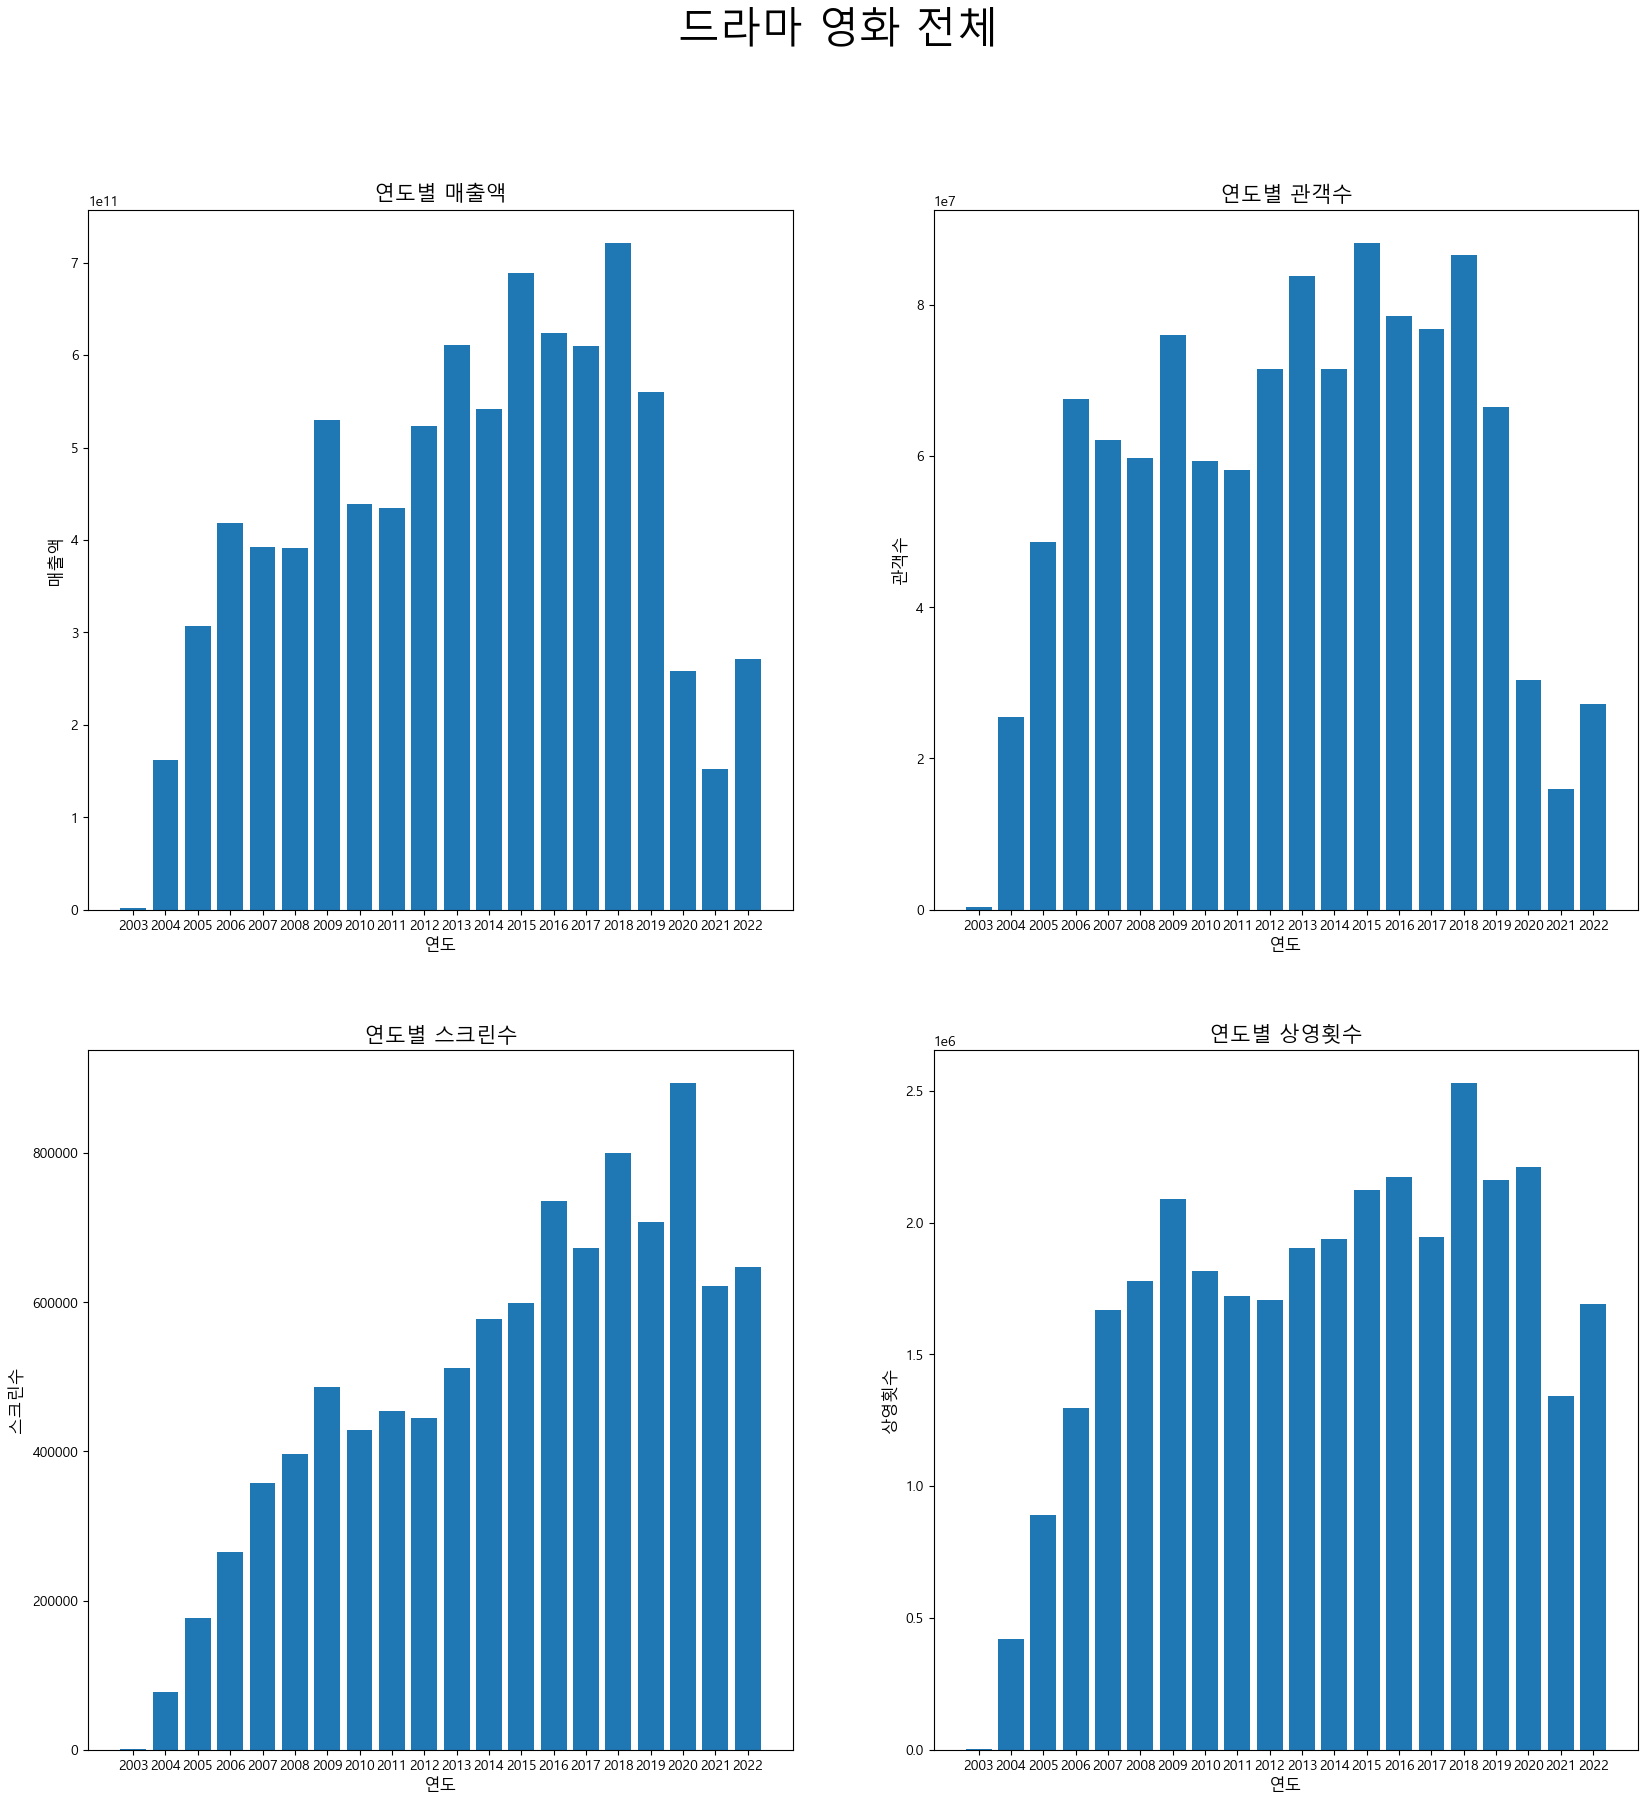

In [58]:
fig = plt.figure(figsize=(20,20))

year_list = list(map(lambda x : str(x),genre_movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(year_list, genre_movie_year_info['매출액'].values)

ax1.set_title('연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(year_list, genre_movie_year_info['관객수'].values)

ax2.set_title('연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(year_list, genre_movie_year_info['스크린수'].values)

ax3.set_title('연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(2,2,4)
ax4.bar(year_list, genre_movie_year_info['상영횟수'].values)

ax4.set_title('연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.suptitle(f'{genre} 영화 전체', size=30)

plt.show()

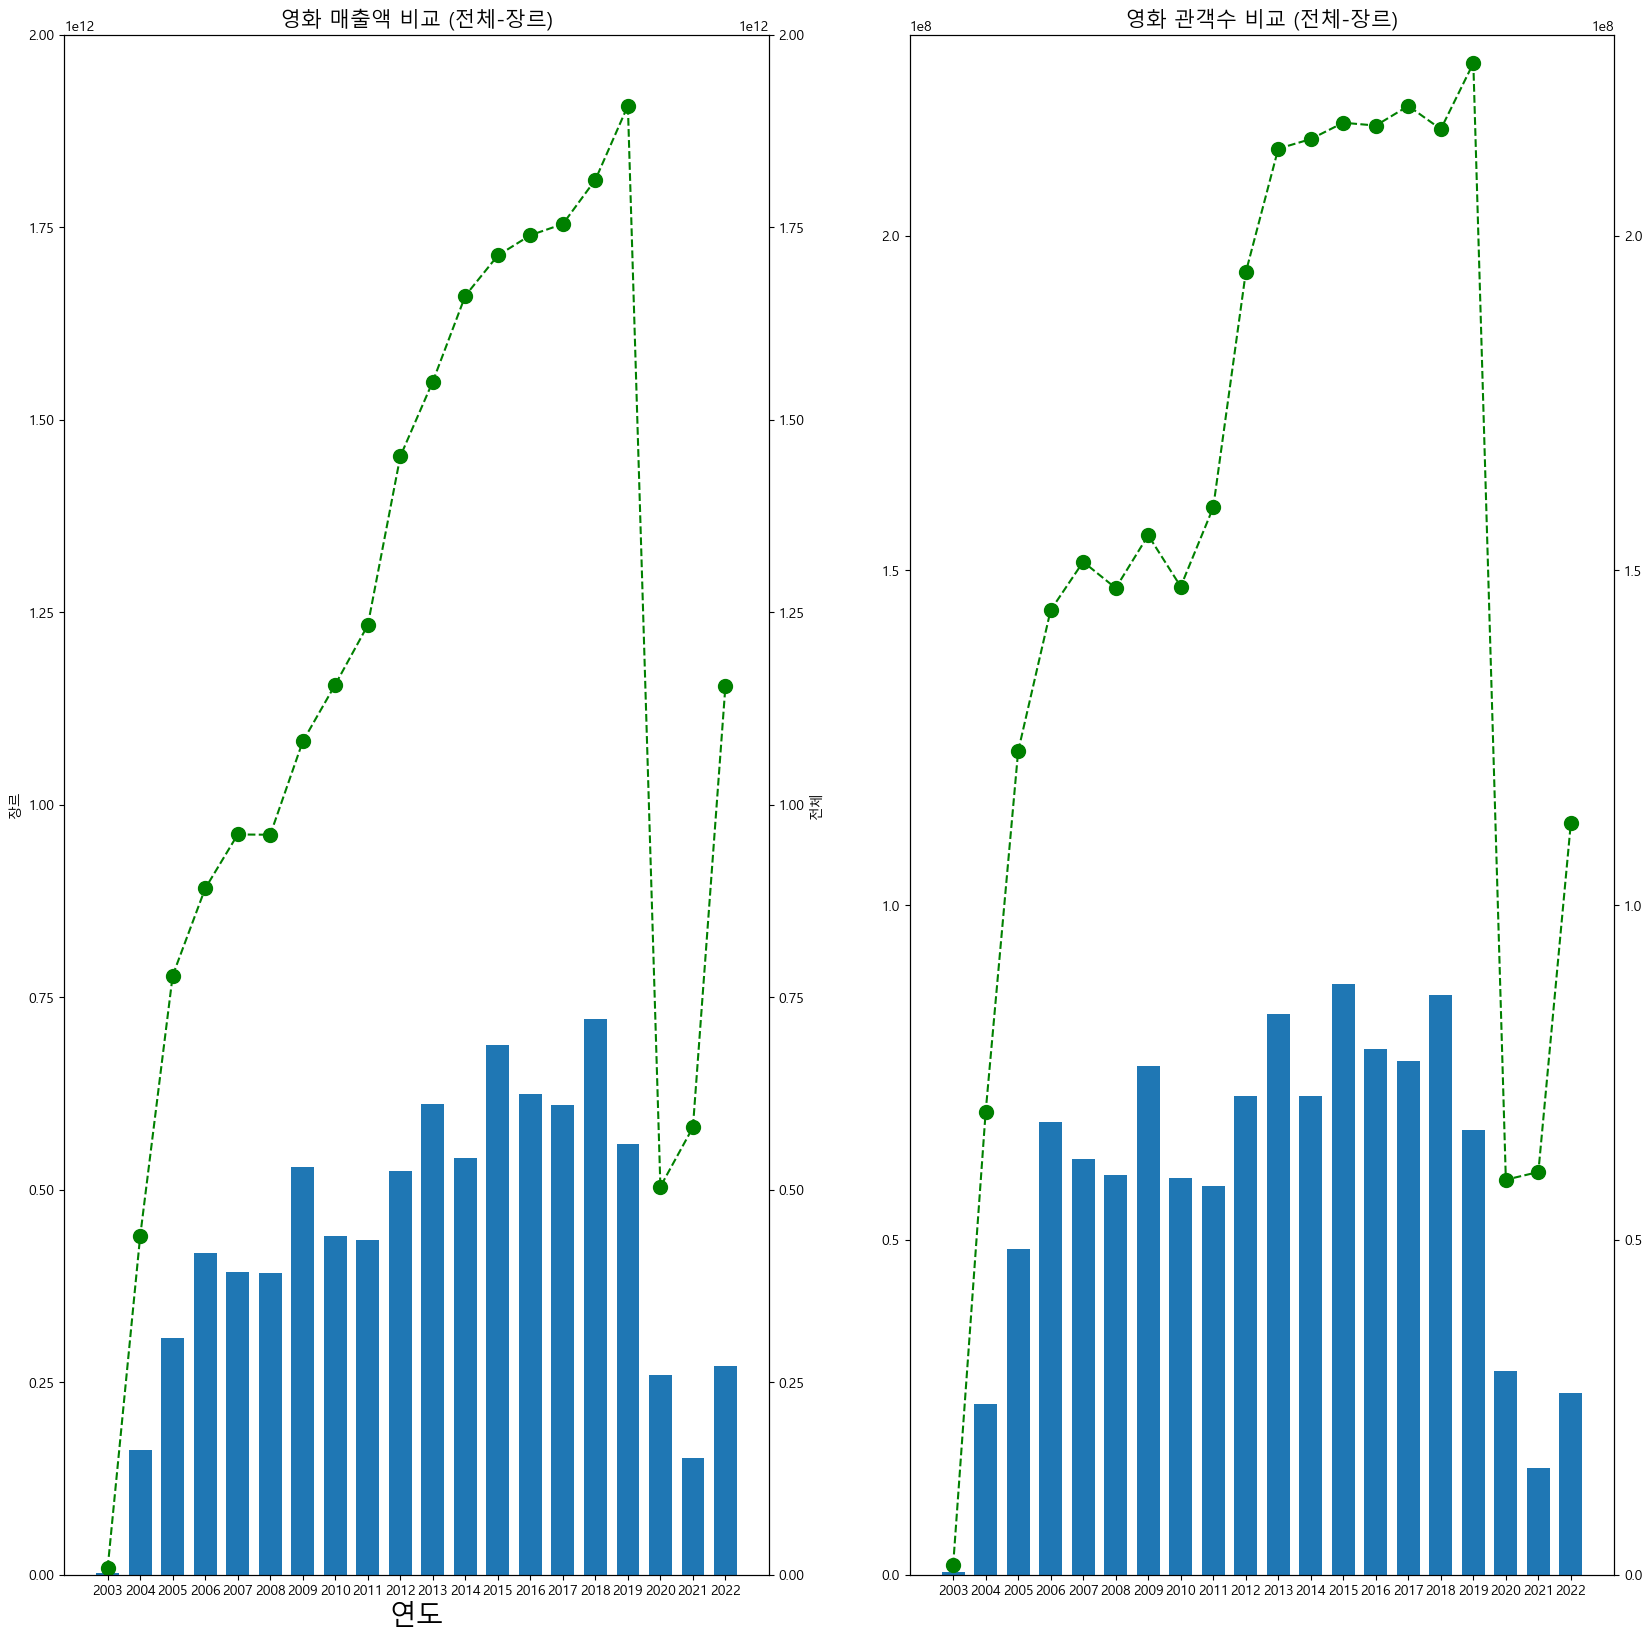

In [7]:
year_list = [str(i) for i in range(2003,2023)]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)

ax1.bar(year_list, genre_movie_year_info['매출액'].values, width=0.7)
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(year_list, total_movie_year_info['매출액'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax1.set_ylim(0, 2000000000000)
ax2.set_ylim(0, 2000000000000)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('장르')
ax2.set_ylabel('전체')

ax3 = fig.add_subplot(1,2,2)
ax3.bar(year_list, genre_movie_year_info['관객수'].values, width=0.7)
ax4 = ax3.twinx()
ax4.plot(year_list, total_movie_year_info['관객수'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax3.set_ylim(0, 230000000)
ax4.set_ylim(0, 230000000)

ax1.set_title('영화 매출액 비교 (전체-장르)', size=15)
ax3.set_title('영화 관객수 비교 (전체-장르)', size=15)
plt.show()

In [8]:
genre_rate1 = pd.merge(genre_movie_year_info['매출액'], total_movie_year_info['매출액'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate1.columns = ['장르','전체']
genre_rate1['비율'] = round(genre_rate1['장르']/genre_rate1['전체']*100,1)
genre_rate1

genre_rate2 = pd.merge(genre_movie_year_info['관객수'], total_movie_year_info['관객수'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate2.columns = ['장르','전체']
genre_rate2['비율'] = round(genre_rate2['장르']/genre_rate2['전체']*100,1)
genre_rate2

,장르,전체,비율
기준연도,,,
2003,366961,1387201,26.5
2004,25474952,69114163,36.9
2005,48607696,123004102,39.5
2006,67587625,144063421,46.9
2007,62105318,151279529,41.1
2008,59729639,147355367,40.5
2009,75939586,155235763,48.9
2010,59306971,147580941,40.2
2011,58088219,159399837,36.4


In [9]:
print("-------매출액--------")
print('장르 합 : ',genre_rate1.sum().장르)
print('전체 합 : ',genre_rate1.sum().전체)
print('평균비율 : ',round(genre_rate1.sum().장르/genre_rate1.sum().전체*100,1))

print("-------관객수--------")
print('장르 합 : ',genre_rate2.sum().장르)
print('전체 합 : ',genre_rate2.sum().전체)
print('평균비율 : ',round(genre_rate2.sum().장르/genre_rate2.sum().전체*100,1))

-------매출액--------
장르 합 :  8639205737404.0
전체 합 :  23340407994802.0
평균비율 :  37.0
-------관객수--------
장르 합 :  1153895343.0
전체 합 :  3046031360.0
평균비율 :  37.9


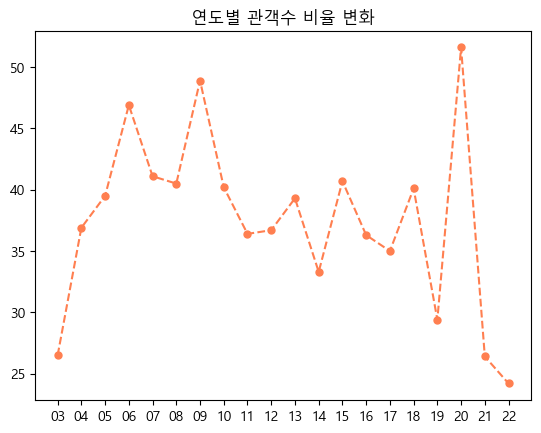

In [10]:
figsize=(20,5)
year_list = [str(i)[2:] for i in range(2003,2023)]
plt.plot(year_list, genre_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("연도별 관객수 비율 변화")
plt.show()

# 연도별로 월별 관객수 비교 분석

In [11]:
movie_year_month_info = movie_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_month_info

매출액       관객수   스크린수    상영횟수
기준연도 기준월                                       
2003 11      478856500     74864    160     871
     12     1893662500    292097    621    3557
2004 1      1030628500    158346    551    2468
     2     12623333000   2018679   2754   14206
     3      6160912000    968323   3013   16855
...                ...       ...    ...     ...
2022 8    110176817244  10802975  96872  359173
     9      7585074808    804930  33474   70905
     10     4431112276    470682  24304   54083
     11    25382737475   2479089  62130  171616
     12    24298939830   2512180  51194  126921

[230 rows x 4 columns]

In [12]:
movie_month_info = movie_genre[movie_genre["기준연도"]!=2003].groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_month_info

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,993534709310,132180871,938017,3134834
2,803554832830,111163514,850587,2977105
3,502629299542,68116421,968328,3051781
4,322233712750,44334330,782926,2343065
5,490197141731,66883814,679524,2161050
6,572893073284,75826981,662956,2231756
7,716607907820,95915444,685593,2421449
8,1243451597268,161087378,805209,3035795
9,590390515183,79637994,755136,2535635


In [42]:
movie_year_month_info.loc[2004]

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,5689197500,897139,1318,7447
2,1326366000,205798,990,4678
3,410732500,63963,395,2038
4,446821500,71266,335,1758
5,7201311800,1109547,3051,18028
6,1079313500,168121,1712,8314
7,1233844500,193326,292,1609
8,14692664000,2297036,4487,26094
9,12005762500,1863030,6268,33680


In [13]:
top_movie_year_month_info = top_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
top_movie_month_info = top_genre[top_genre["기준연도"]!=2003].groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})

In [14]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6716\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


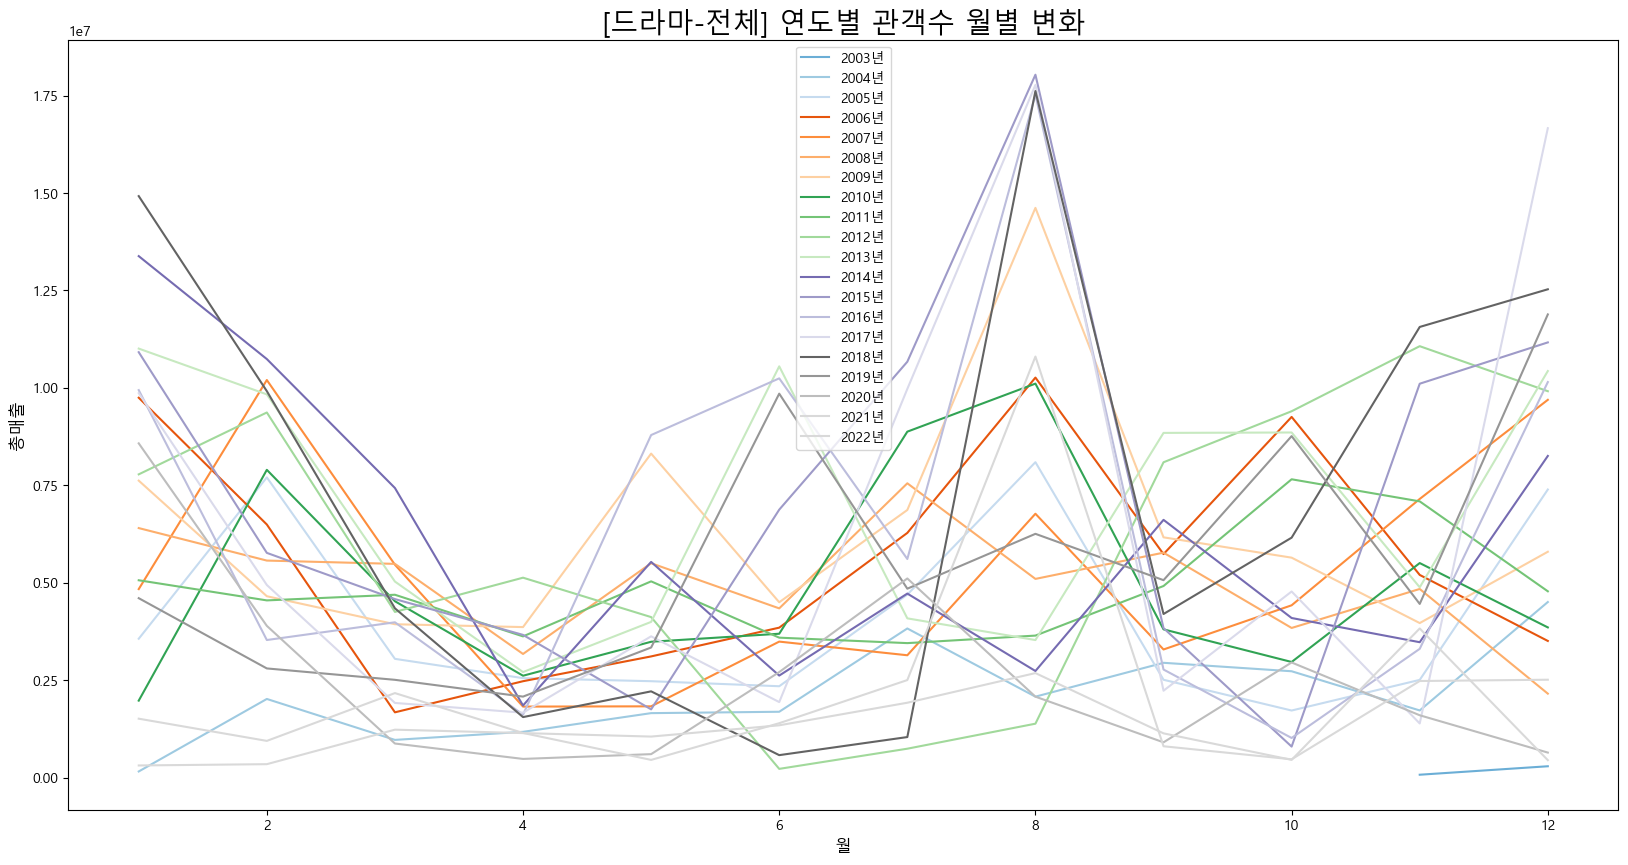

In [47]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2003,2023)

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(movie_year_month_info.loc[year]['관객수'].index,movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")

ax.legend(loc="best")
ax.set_title(f'[{genre}-전체] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

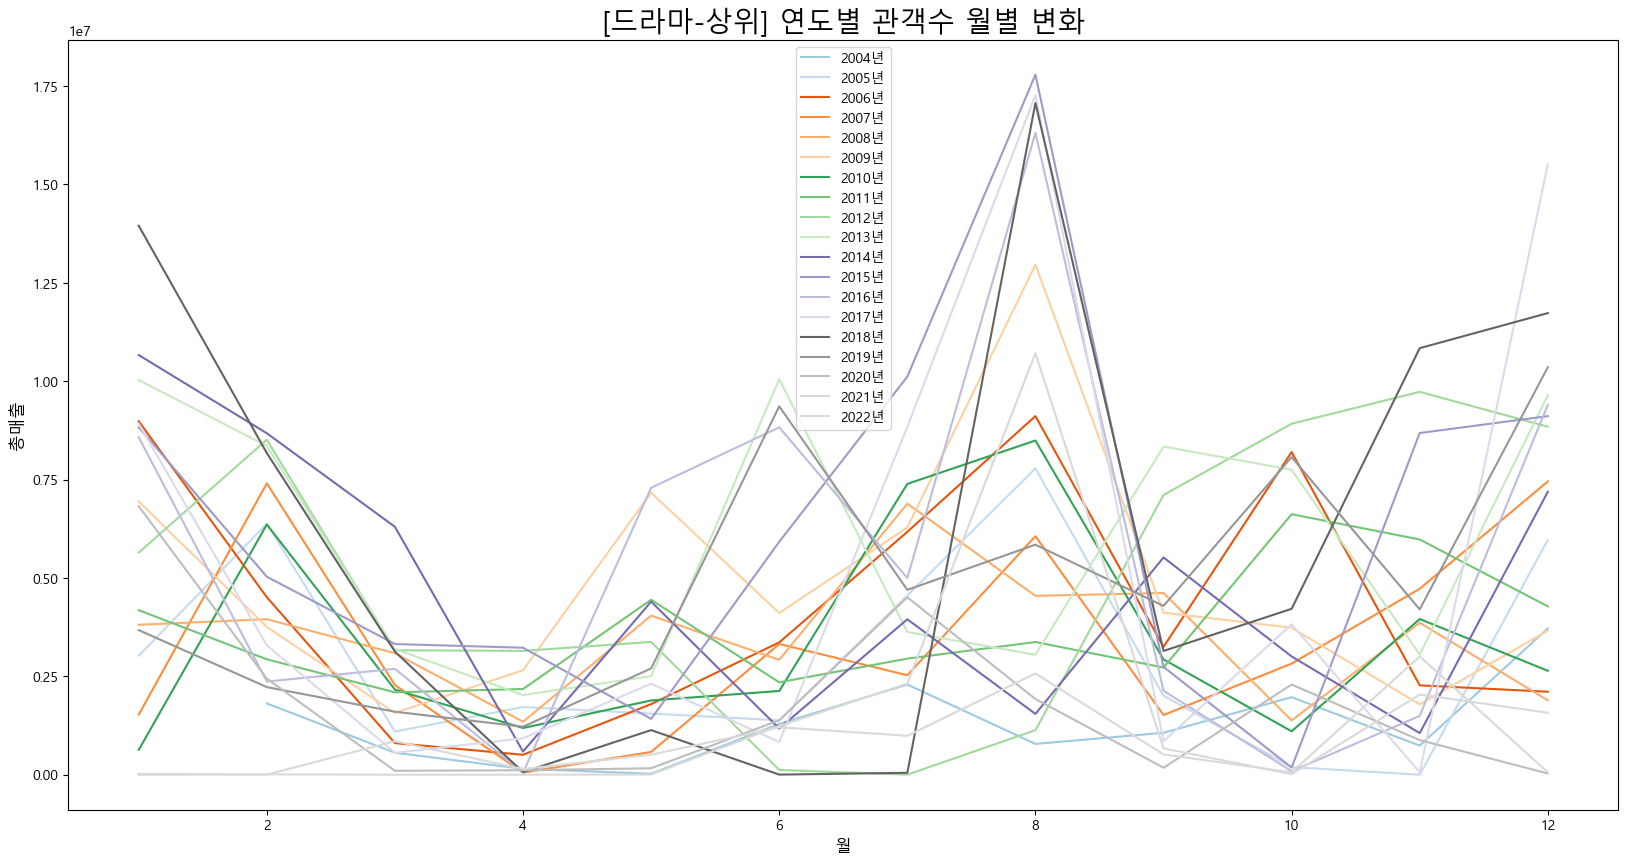

In [48]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2003,2023)

for i in range(len(year_list)):
    try: 
        year = year_list[i]
        ax.plot(top_movie_year_month_info.loc[year]['관객수'].index,top_movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")
    except:
        pass
    
ax.legend(loc="best")
ax.set_title(f'[{genre}-상위] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

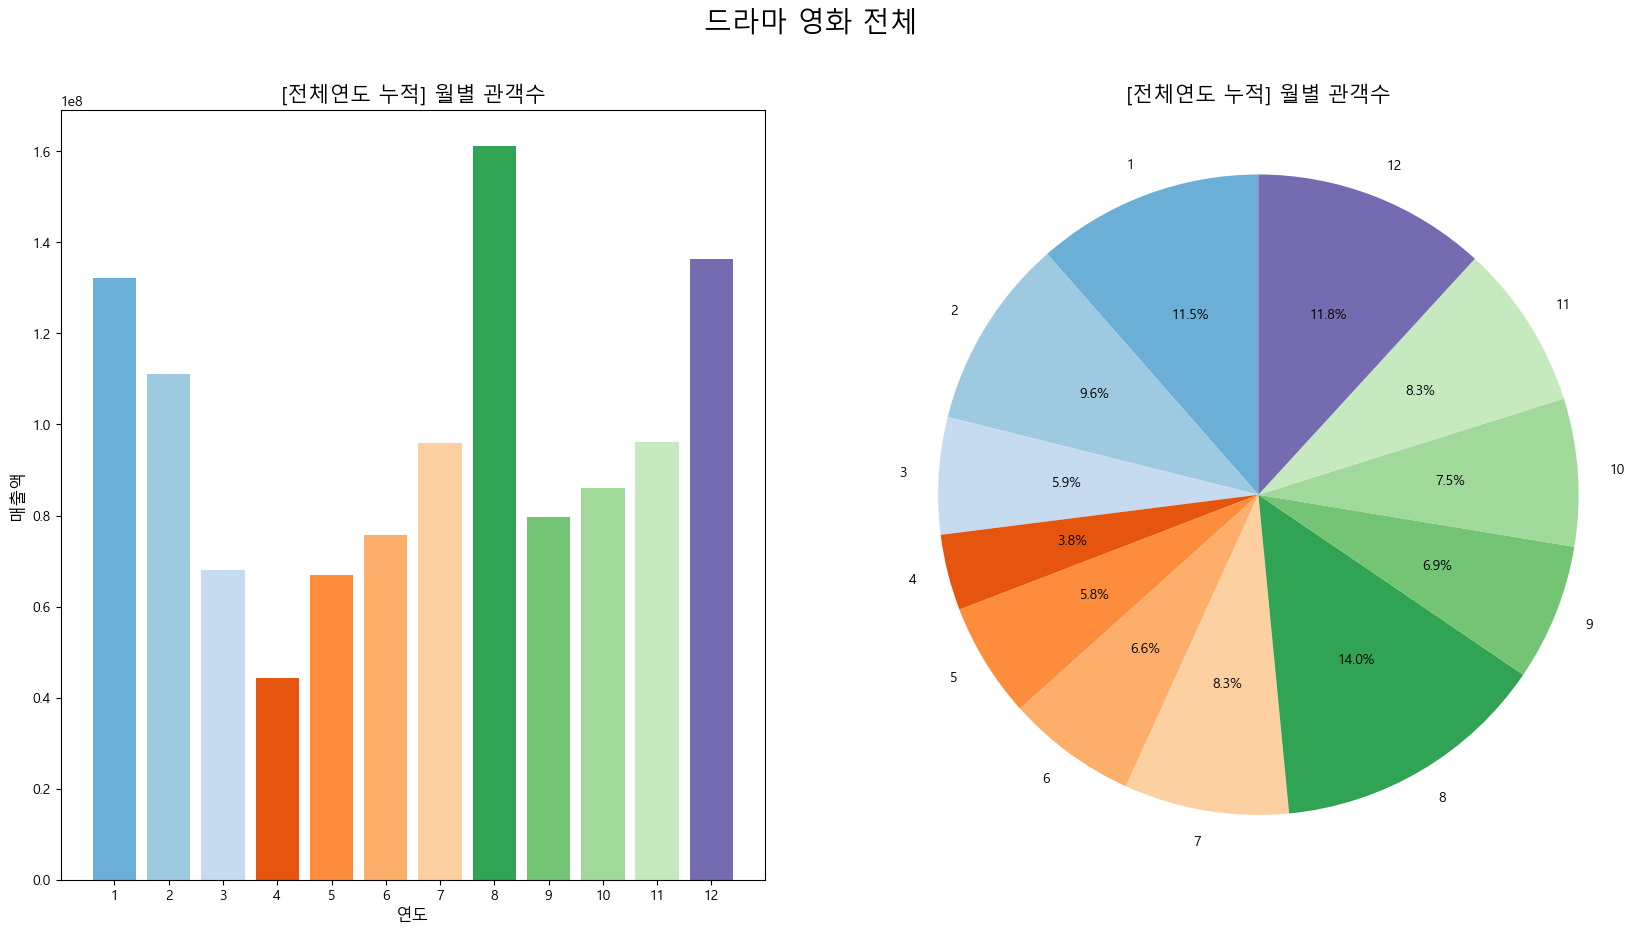

In [18]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, movie_month_info['관객수'].values, color=colors)

ax1.set_title('[전체연도 누적] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적] 월별 관객수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

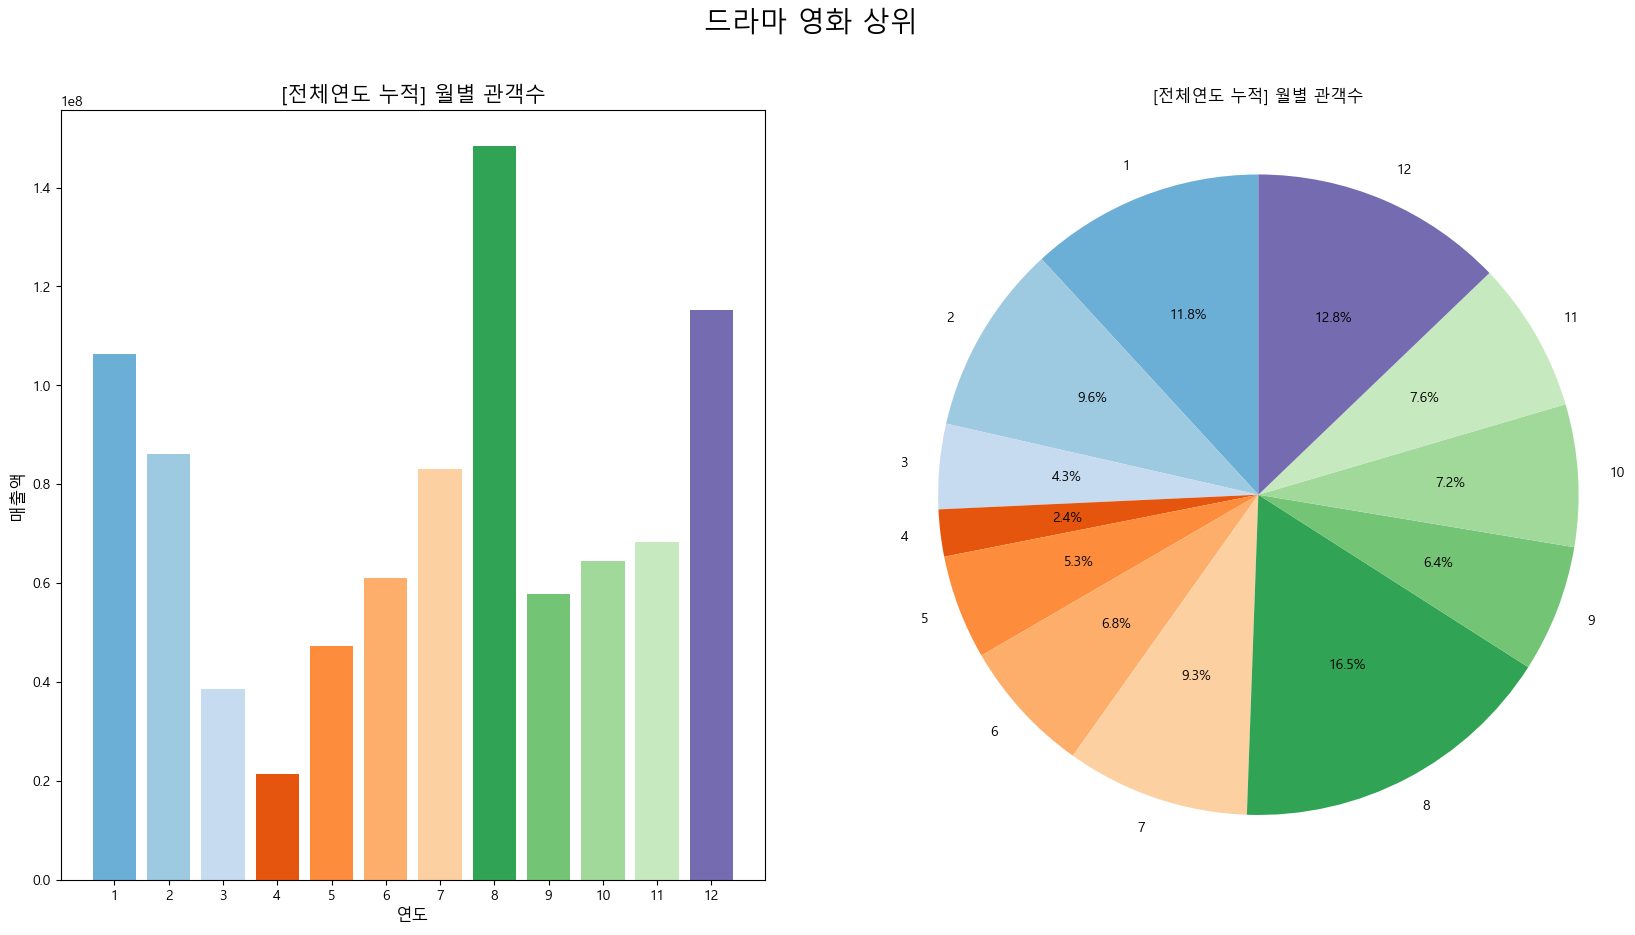

In [19]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(month_list, top_movie_month_info['관객수'].values, color=colors)

ax1.set_title('[전체연도 누적] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(top_movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적] 월별 관객수')
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

# 연도별 개봉한 영화수

In [20]:
open_count = movie_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count.drop_duplicates(inplace=True)

print(len(open_count))

7885


In [26]:
open_count_df1 = open_count[open_count["개봉연도"]>2003].groupby(['개봉연도'])['영화명'].count()
open_count_df1

개봉연도
2004     92
2005    151
2006    174
2007    245
2008    365
2009    206
2010    227
2011    217
2012    237
2013    356
2014    379
2015    359
2016    529
2017    575
2018    550
2019    603
2020    689
2021    755
2022    243
2023     20
Name: 영화명, dtype: int64

In [27]:
open_count_df2 = open_count[open_count["개봉연도"]>2003].groupby(['개봉월'])['영화명'].count()
open_count_df2

개봉월
1     528
2     529
3     648
4     614
5     582
6     558
7     503
8     512
9     554
10    611
11    698
12    635
Name: 영화명, dtype: int64

In [25]:
open_count_df1

개봉연도
2004     92
2005    151
2006    174
2007    245
2008    365
2009    206
2010    227
2011    217
2012    237
2013    356
2014    379
2015    359
2016    529
2017    575
2018    550
2019    603
2020    689
2021    755
2022    243
2023     20
Name: 영화명, dtype: int64

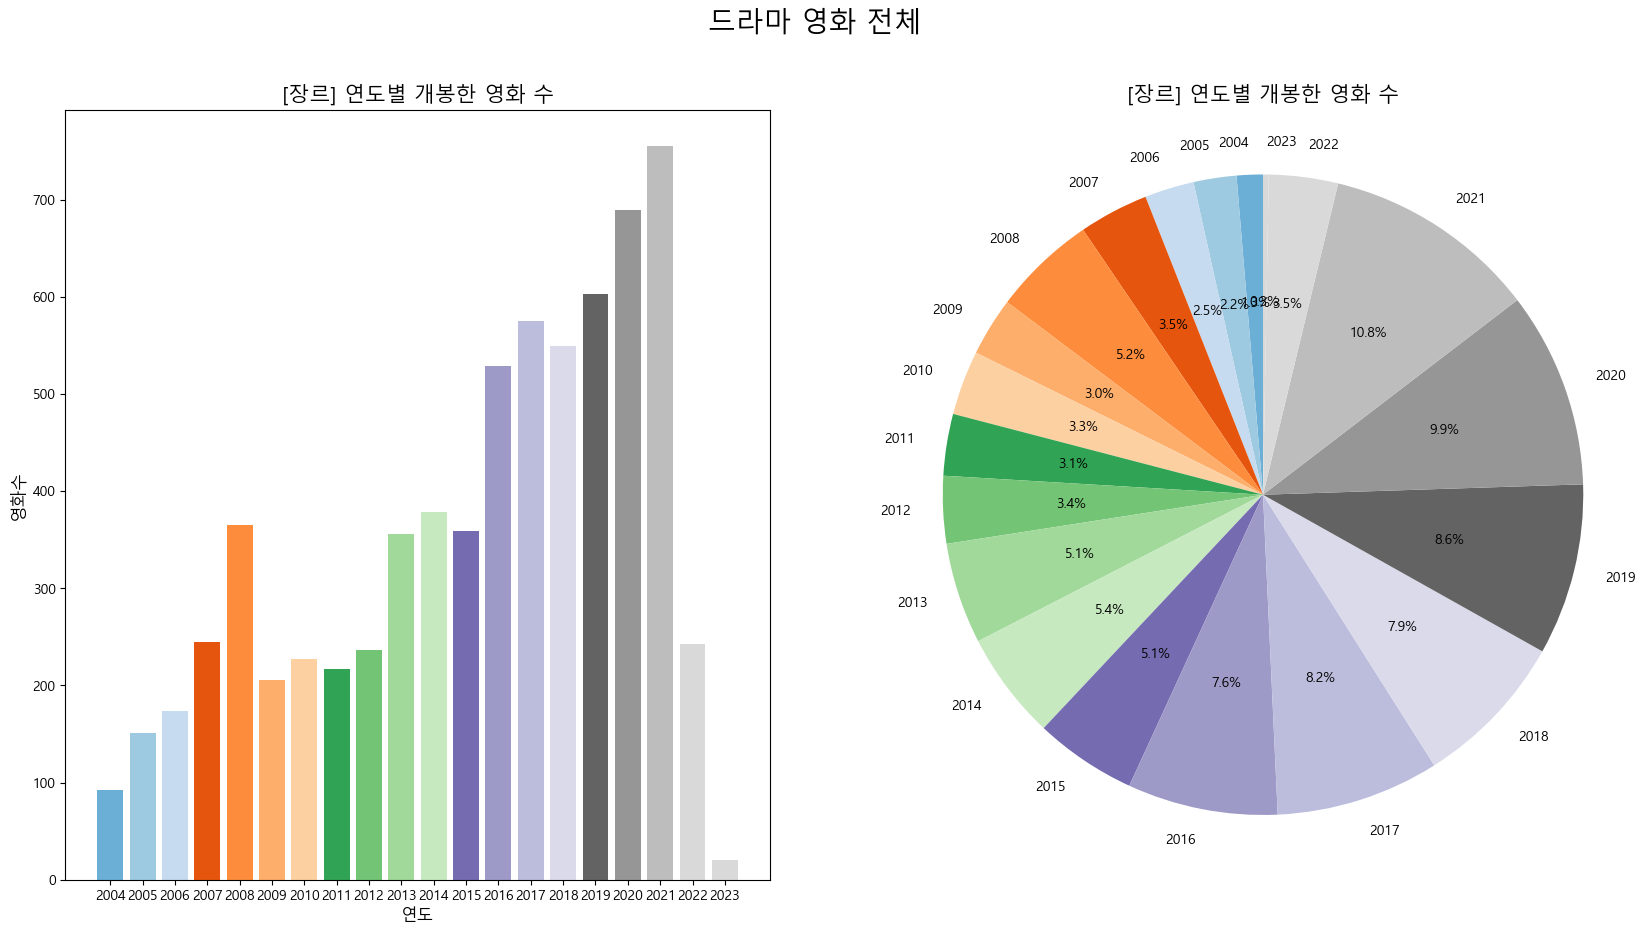

In [52]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2004,2024)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(year_list, open_count_df1.values, color=colors)

ax1.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

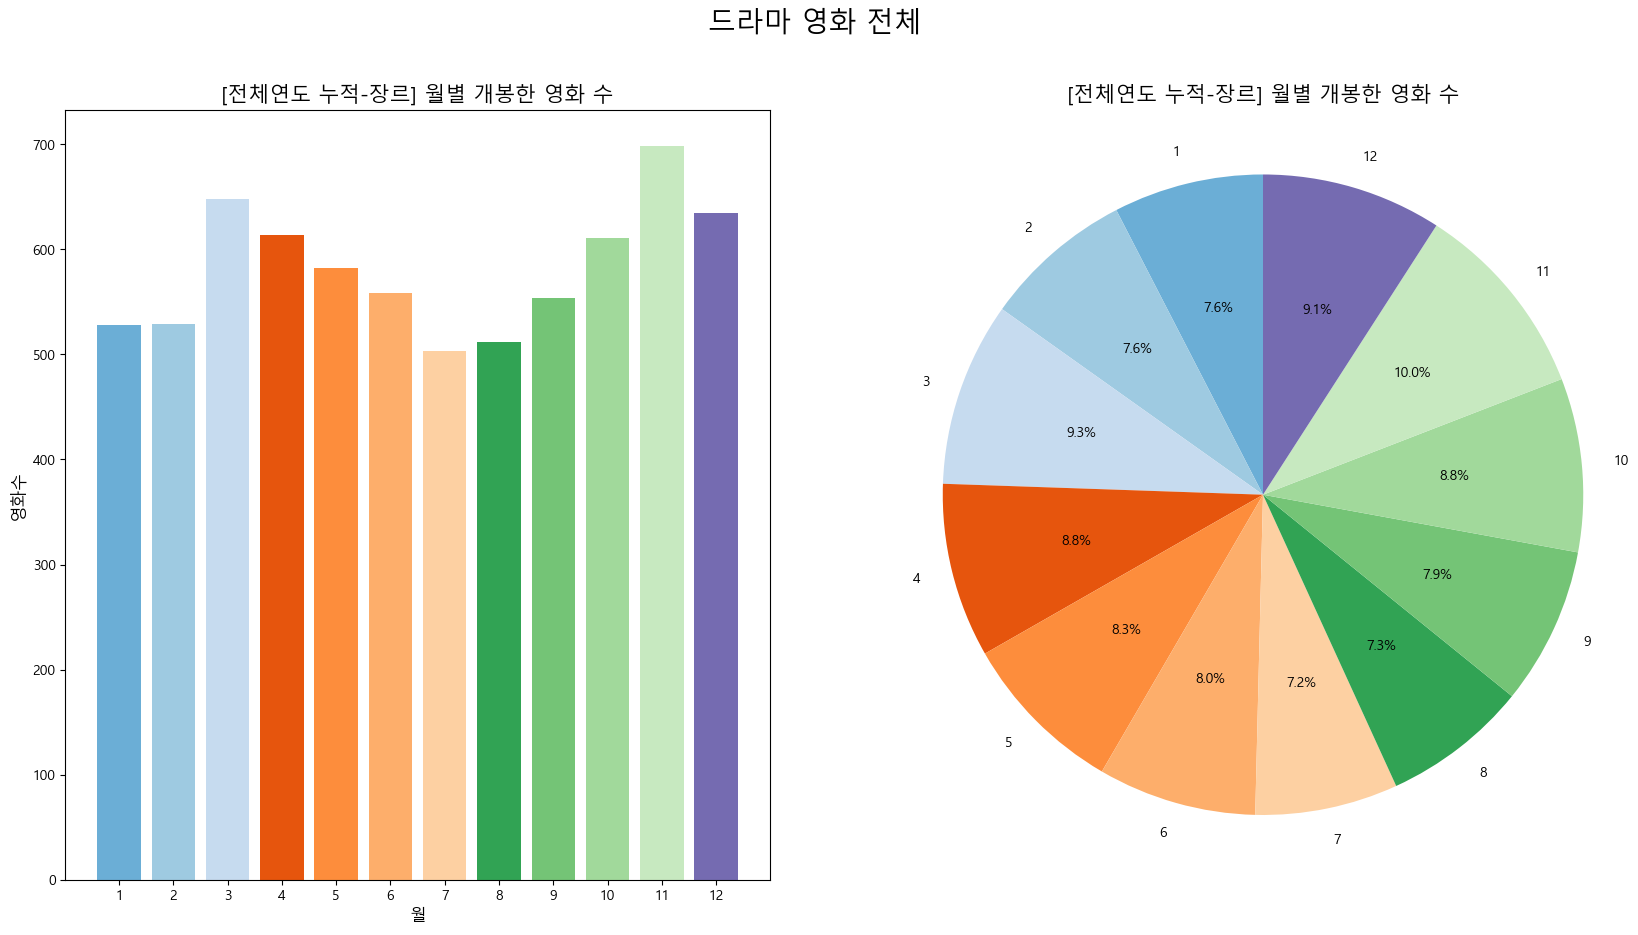

In [33]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2004,2024)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, open_count_df2.values, color=colors)

ax1.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

In [34]:
top_open_count = top_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
top_open_count.drop_duplicates(inplace=True)

print(len(top_open_count))

291


In [35]:
top_open_count_df1 = top_open_count[top_open_count["개봉연도"]>2003].groupby(['개봉연도'])['영화명'].count()
top_open_count_df1

개봉연도
2004    11
2005    13
2006    15
2007    20
2008    20
2009    20
2010    15
2011    17
2012    18
2013    19
2014    20
2015    16
2016    19
2017    16
2018    16
2019    19
2020     7
2021     4
2022     6
Name: 영화명, dtype: int64

In [36]:
top_open_count_df2 = top_open_count[top_open_count["개봉연도"]>2003].groupby(['개봉월'])['영화명'].count()
top_open_count_df2

개봉월
1     27
2     32
3     13
4     18
5     18
6     21
7     29
8     23
9     21
10    27
11    21
12    41
Name: 영화명, dtype: int64

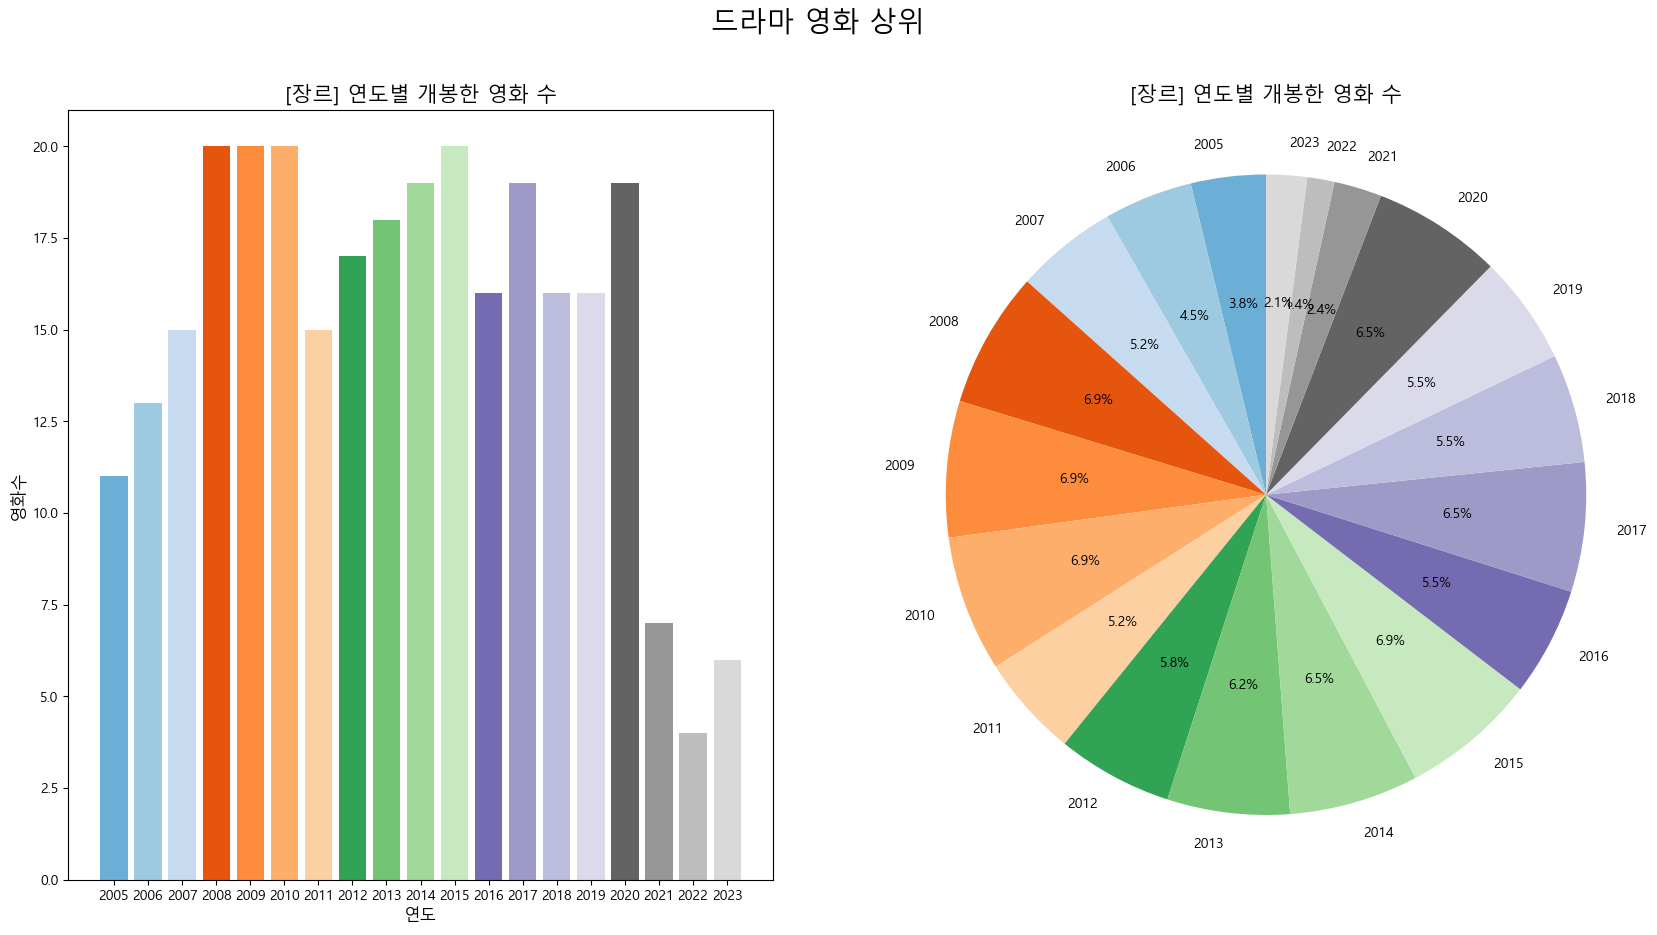

In [54]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2005,2024)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(year_list, top_open_count_df1.values, color=colors)

ax1.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

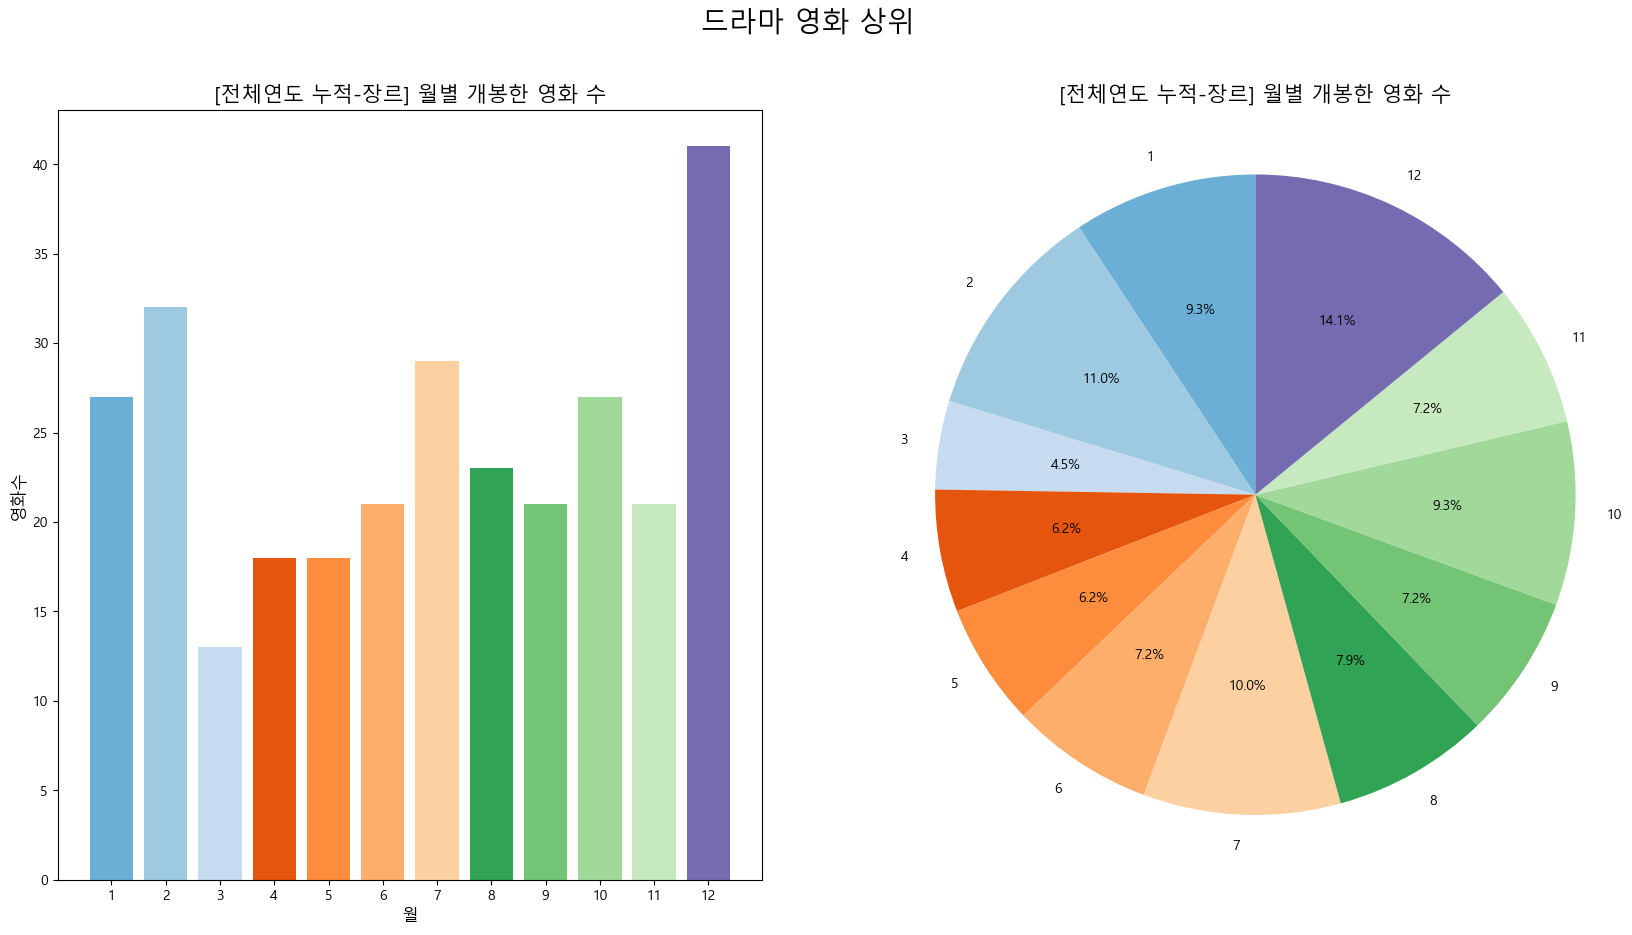

In [55]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, top_open_count_df2.values, color=colors)

ax1.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

In [40]:
top_open_count_df1
top_open_count_df2

개봉월
1     27
2     32
3     13
4     18
5     18
6     21
7     29
8     23
9     21
10    27
11    21
12    41
Name: 영화명, dtype: int64

In [41]:
top_open_count_df1

개봉연도
2004    11
2005    13
2006    15
2007    20
2008    20
2009    20
2010    15
2011    17
2012    18
2013    19
2014    20
2015    16
2016    19
2017    16
2018    16
2019    19
2020     7
2021     4
2022     6
Name: 영화명, dtype: int64

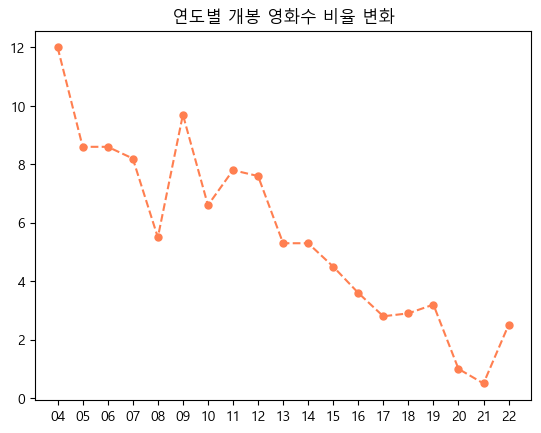

In [56]:
open_count_rate1 = pd.merge(open_count_df1, top_open_count_df1,
                            left_on = '개봉연도', right_on = '개봉연도', how = 'left')

open_count_rate1.columns = ['전체','장르']
open_count_rate1['비율'] = round(open_count_rate1['장르']/open_count_rate1['전체']*100,1)

figsize=(20,5)
year_list = [str(i)[2:] for i in range(2004,2024)]
plt.plot(year_list, open_count_rate1['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("연도별 개봉 영화수 비율 변화")
plt.show()

In [44]:
open_count_rate1.sort_values(['비율'],ascending=False)[:10]

,전체,장르,비율
개봉연도,,,
2004,92,11.0,12.0
2009,206,20.0,9.7
2006,174,15.0,8.6
2005,151,13.0,8.6
2007,245,20.0,8.2
2011,217,17.0,7.8
2012,237,18.0,7.6
2010,227,15.0,6.6
2008,365,20.0,5.5


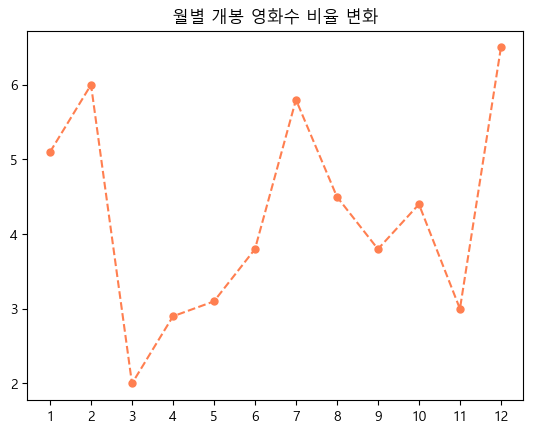

In [57]:
open_count_rate2 = pd.merge(open_count_df2, top_open_count_df2,
                            left_on = '개봉월', right_on = '개봉월', how = 'left')

open_count_rate2.columns = ['전체','장르']
open_count_rate2['비율'] = round(open_count_rate2['장르']/open_count_rate2['전체']*100,1)

figsize=(20,5)
month_list = [str(i) for i in range(1,13)]
plt.plot(month_list, open_count_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("월별 개봉 영화수 비율 변화")
plt.show()

In [46]:
open_count_rate2.sort_values(['비율'],ascending=False)['비율'].agg(['min', 'max', 'mean'])

min     2.000000
max     6.500000
mean    4.241667
Name: 비율, dtype: float64

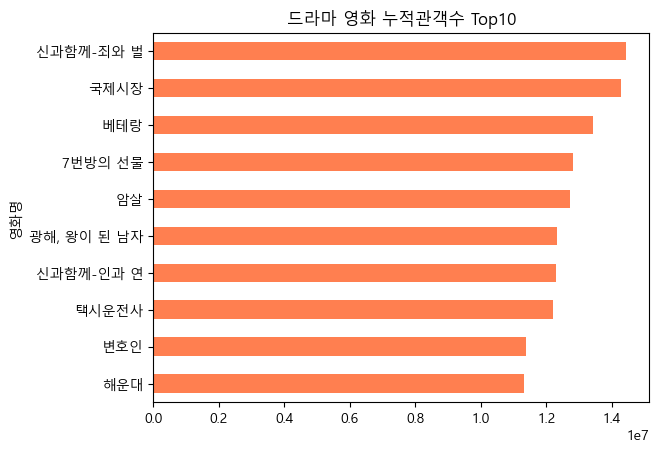

In [59]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10].sort_values(['누적관객수'])[:10].reset_index().set_index('영화명')["누적관객수"].plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()

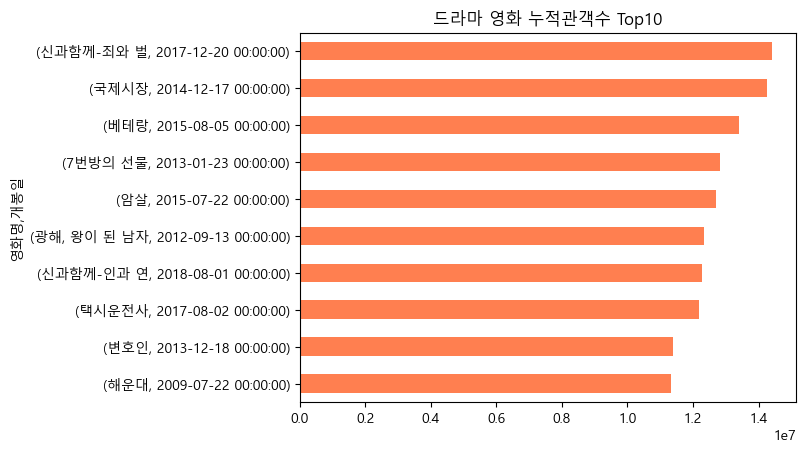

In [60]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10]["누적관객수"].sort_values().plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()